In [1]:
import pandas as pd
import os
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_barcelona.csv')

In [26]:
df.shape

(4544, 16)

In [27]:
df = df.drop('Unnamed: 0', axis=1)

In [28]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [29]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,senior software engineer,118
1,ios developer,86
2,android developer,78
3,software development engineer,48
4,senior ios developer,44
5,software engineer,40
6,senior frontend developer,36
7,senior android developer,34
8,frontend developer,30
9,full stack developer,30


In [30]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [31]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile development' in y) or ('mobile developer' in y):
            return 'keep'
        elif ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'      

In [32]:
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [33]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [34]:
df.shape

(2388, 15)

# Top Companies Hiring

In [85]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,king,92
1,glovo,92
2,page personnel,82
3,picsart,74
4,agoda,66
5,between technology,64
6,adevinta,50
7,zendesk,44
8,inetum,44
9,scopely,42


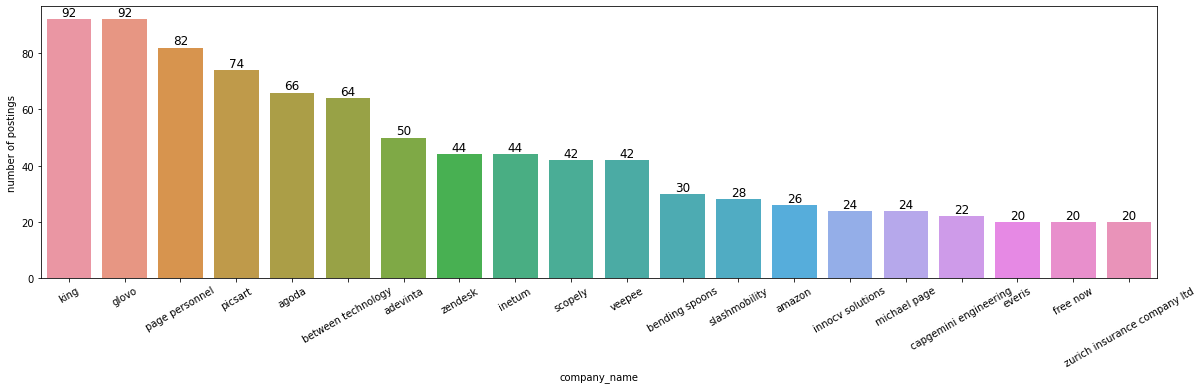

In [118]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions 

In [62]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,ios developer,86
1,android developer,78
2,senior ios developer,44
3,senior android developer,34
4,android engineer,24
5,programador full stack,22
6,android developer video,22
7,android engineer remote or relocate,22
8,mobile developer,20
9,ios mobile developer,20


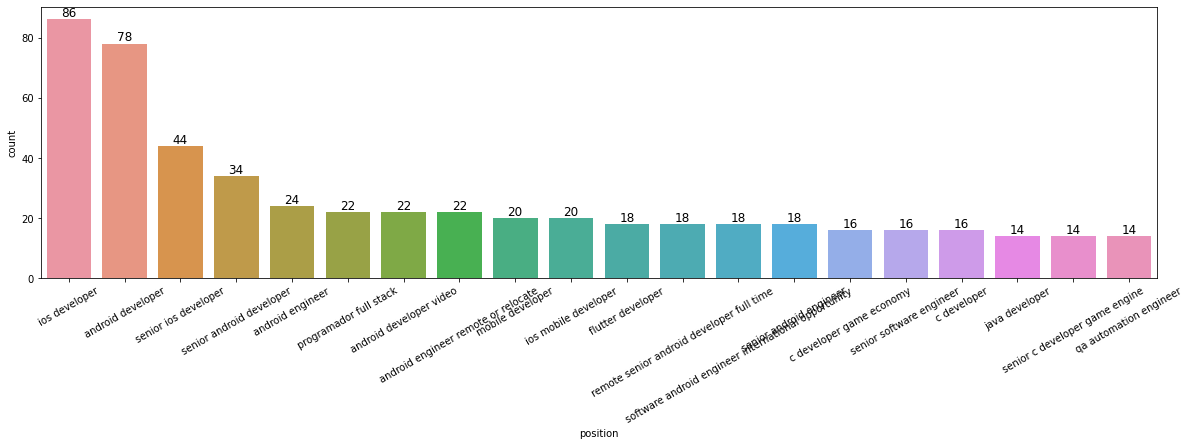

In [117]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [36]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [38]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [39]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [40]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [41]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,994
1,android,604
2,css,546
3,javascript,482
4,programming language,454
5,java,364
6,english,284
7,php,262
8,ios,242
9,html,242


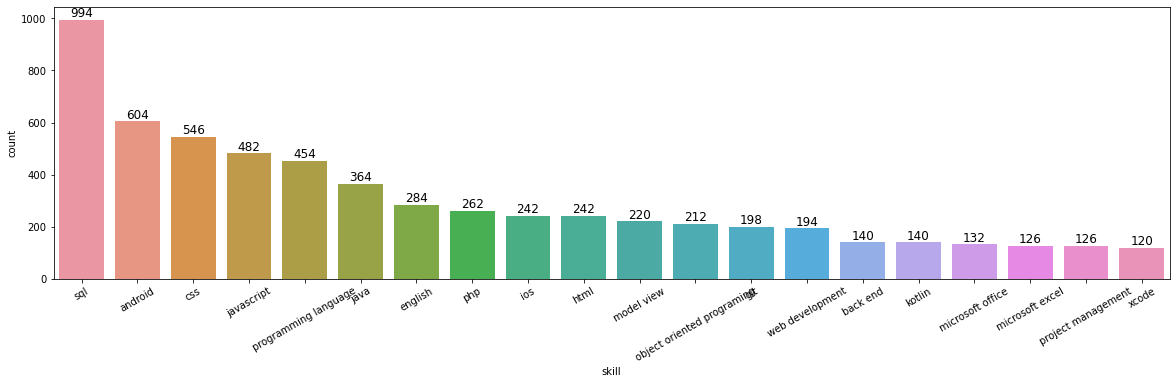

In [116]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [142]:
skills = x['skill']
skills = list(skills.values)

In [144]:
skills.append('swift')

In [150]:
other_skills = ['xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [151]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [135]:
import re

In [153]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [154]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [155]:
skills_count

,skill,count
0,ios,1934
1,git,1390
2,android,1374
3,design,1300
4,java,1284
5,unity,1106
6,english,1104
7,testing,876
8,engineering,862
9,communication,708


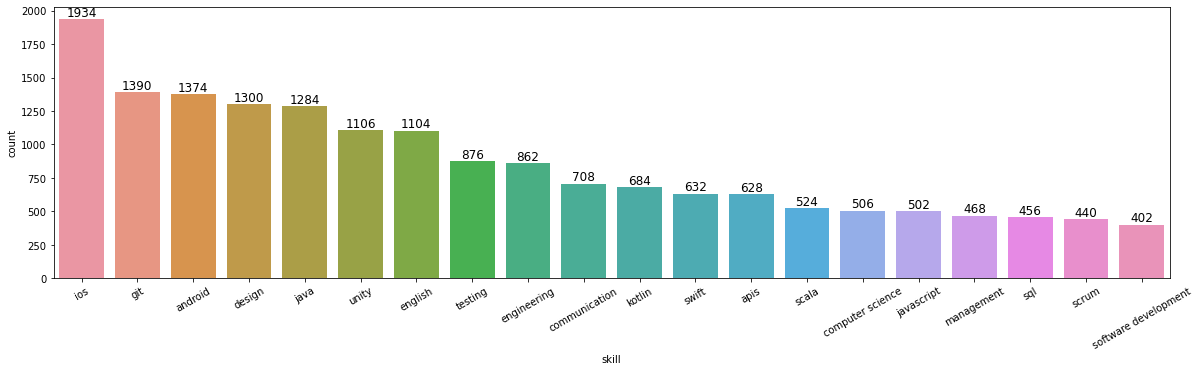

In [156]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [159]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [51]:
df['position'].value_counts()

ios developer                                                                                                        86
android developer                                                                                                    78
senior ios developer                                                                                                 44
senior android developer                                                                                             34
android engineer                                                                                                     24
programador full stack                                                                                               22
android developer video                                                                                              22
android engineer remote or relocate                                                                                  22
mobile developer                        

In [56]:
def iOS_android_positions(x):
    if 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    else:
        return 'other'    

In [57]:
df['platform'] = df['position'].apply(iOS_android_positions)

# iOS Analysis

In [58]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(424, 16)

In [157]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,412
1,swift,382
2,git,276
3,unity,212
4,android,210
5,english,198
6,objective c,188
7,apis,188
8,design,186
9,engineering,176


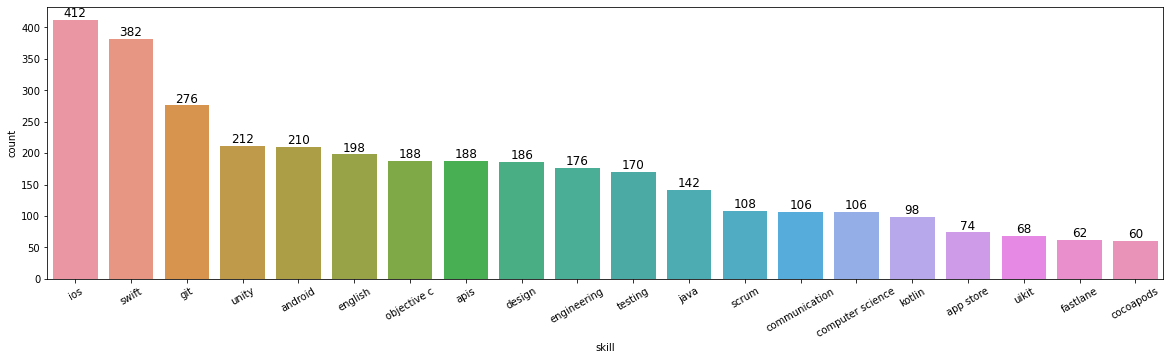

In [158]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [125]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,glovo,34
1,picsart,28
2,adevinta,22
3,veepee,20
4,slashmobility,14
5,agoda,14
6,elements,12
7,zendesk,12
8,contentsquare,12
9,proton,12


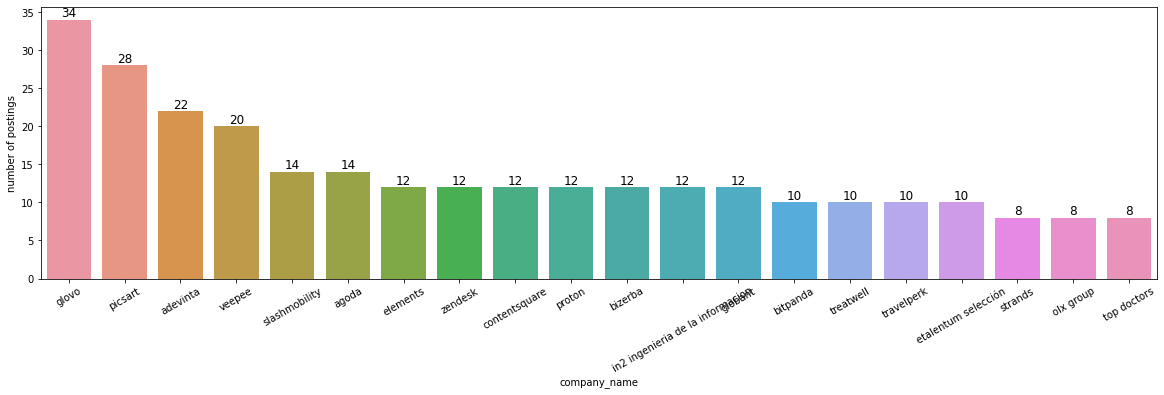

In [128]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [72]:
android_df = df[df['platform']=='android']
android_df.shape

(510, 16)

In [163]:
android_df.reset_index(drop=True, inplace=True)

In [170]:
'ios' in android_df['descriptions'][5]

True

In [171]:
android_df['descriptions'][5]

'ocado technology powering the future of retail through sustained disruptive technology innovation ocado technology is putting the world s retailers online using the cloud robotics ai and iot we develop the innovative software and systems that power ocado com the world s largest online only grocery retailer as well as the global ocado smart platform with everything from websites to fully autonomous warehouse that we design in house our employees need to be specialists in a wide range of technologies to help drive our business we champion a value led culture to get our teams working at their very best and to help create a collaborative working environment that our people love core values of trust autonomy craftsmanship collaboration and learn fast help drive our innovative culture we are looking for an android software engineer to join our platform team the platform android team in the ecommerce platform department has the mission to provide a world class platform that enables feature t

In [166]:
android_df['descriptions'][1]

'we strongly encourage people of colour lesbian gay bisexual transgender queer and non binary people veterans parents and individuals with disabilities to apply bumble is an equal opportunity employer and welcomes everyone to our team if you need reasonable adjustments at any point in the application or interview process please let us know in your application please feel free to note which pronouns you use for example she her hers he him his they them theirs etc key accountabilities hands on development analyse product specifications design implementations write code and rapidly deliver android app feature designsleading technical ideas and suggestions to enhance the direction of the productproject ownership and driving process related decisionsmentoring and guidance of junior team memberswrite test cases and work with qa on a weekly release cyclework within an agile team daily standups weekly planning meetings maintain build systems and write unit testsreview analytics and performance

In [159]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android

,skill,count
0,android,510
1,design,386
2,kotlin,380
3,java,348
4,unity,332
5,git,330
6,ios,310
7,english,270
8,engineering,252
9,testing,194


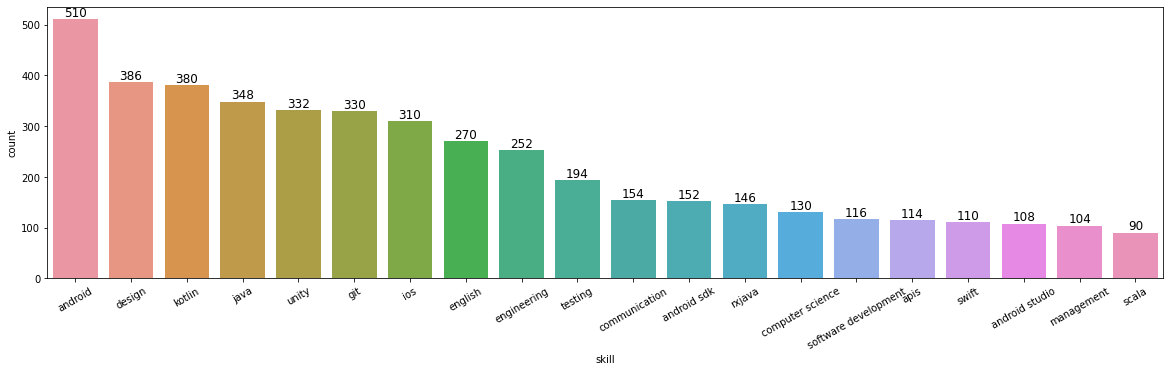

In [160]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [80]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,glovo,44
1,picsart,42
2,zendesk,26
3,agoda,22
4,bending spoons,22
5,page personnel,22
6,adevinta,20
7,toptal,18
8,veepee,14
9,pulselive,12


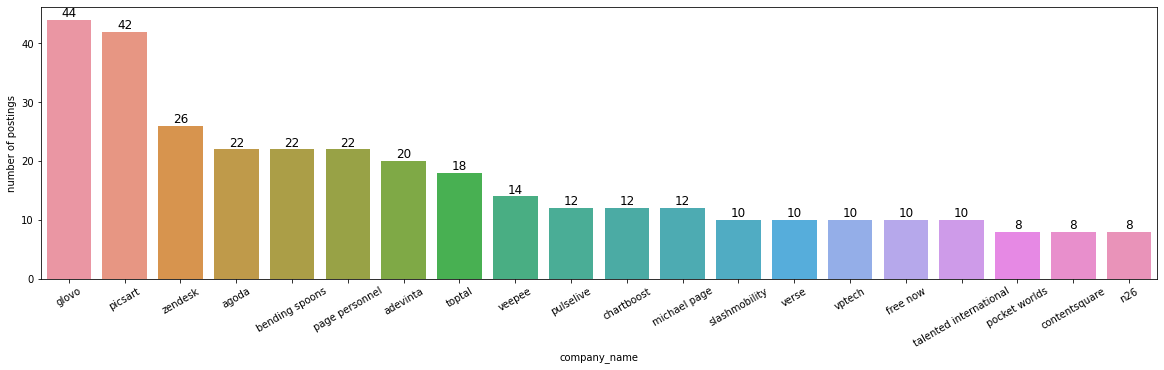

In [130]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()